 Uključivanje potrebnih .xml fajlova tj. haar kaskade za detekciju lica, usta i očiju:

base code: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
!wget https://raw.githubusercontent.com/opencv/opencv/3.4/data/haarcascades/haarcascade_eye.xml

--2022-05-30 19:24:31--  https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2022-05-30 19:24:31 (18.8 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

--2022-05-30 19:24:31--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_smile.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... co

Uključivanje biblioteka:

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from copy import deepcopy
import matplotlib.pyplot as plt


Učitavanje kaskada lica, očiju i usta iz .xml fajlova:

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

Preuzimam sa interneta četiri testne slike i imenujem ih respektivno: lice1, lice2, lice3 i lice4:

In [ ]:
!wget https://1vw4gb3u6ymm1ev2sp2nlcxf-wpengine.netdna-ssl.com/wp-content/uploads/shutterstock_149962697-946x658.jpg 
!mv shutterstock_149962697-946x658.jpg lice1.jpg

--2022-05-30 19:24:32--  https://1vw4gb3u6ymm1ev2sp2nlcxf-wpengine.netdna-ssl.com/wp-content/uploads/shutterstock_149962697-946x658.jpg
Resolving 1vw4gb3u6ymm1ev2sp2nlcxf-wpengine.netdna-ssl.com (1vw4gb3u6ymm1ev2sp2nlcxf-wpengine.netdna-ssl.com)... 94.31.29.99
Connecting to 1vw4gb3u6ymm1ev2sp2nlcxf-wpengine.netdna-ssl.com (1vw4gb3u6ymm1ev2sp2nlcxf-wpengine.netdna-ssl.com)|94.31.29.99|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35244 (34K) [image/jpeg]
Saving to: ‘shutterstock_149962697-946x658.jpg’

shutterstock_149962 100%[===================>]  34.42K  --.-KB/s    in 0s      

2022-05-30 19:24:32 (231 MB/s) - ‘shutterstock_149962697-946x658.jpg’ saved [35244/35244]



In [ ]:
!wget https://as1.ftcdn.net/v2/jpg/01/97/11/64/1000_F_197116416_hpfTtXSoJMvMqU99n6hGP4xX0ejYa4M7.jpg
!mv 1000_F_197116416_hpfTtXSoJMvMqU99n6hGP4xX0ejYa4M7.jpg lice2.jpg

--2022-05-30 19:24:32--  https://as1.ftcdn.net/v2/jpg/01/97/11/64/1000_F_197116416_hpfTtXSoJMvMqU99n6hGP4xX0ejYa4M7.jpg
Resolving as1.ftcdn.net (as1.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to as1.ftcdn.net (as1.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154857 (151K) [image/jpeg]
Saving to: ‘1000_F_197116416_hpfTtXSoJMvMqU99n6hGP4xX0ejYa4M7.jpg’

1000_F_197116416_hp 100%[===================>] 151.23K  --.-KB/s    in 0.02s   

2022-05-30 19:24:32 (6.51 MB/s) - ‘1000_F_197116416_hpfTtXSoJMvMqU99n6hGP4xX0ejYa4M7.jpg’ saved [154857/154857]



In [ ]:
!wget https://live.staticflickr.com/388/19259120435_66df748ee3_b.jpg
!mv 19259120435_66df748ee3_b.jpg lice3.jpg

--2022-05-30 19:24:32--  https://live.staticflickr.com/388/19259120435_66df748ee3_b.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 13.226.46.163, 2600:9000:2342:b600:0:5a51:64c9:c681, 2600:9000:2342:8000:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.226.46.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘19259120435_66df748ee3_b.jpg’

19259120435_66df748     [ <=>                ] 110.14K  --.-KB/s    in 0.04s   

2022-05-30 19:24:33 (2.74 MB/s) - ‘19259120435_66df748ee3_b.jpg’ saved [112784]



In [ ]:
!wget https://assets.vogue.com/photos/619e841aad34e792927f7518/master/w_1600,c_limit/IndigenousModels-RafaelMartinez-009.jpg
!mv IndigenousModels-RafaelMartinez-009.jpg lice4.jpg

--2022-05-30 19:24:33--  https://assets.vogue.com/photos/619e841aad34e792927f7518/master/w_1600,c_limit/IndigenousModels-RafaelMartinez-009.jpg
Resolving assets.vogue.com (assets.vogue.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to assets.vogue.com (assets.vogue.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 596532 (583K) [image/jpeg]
Saving to: ‘IndigenousModels-RafaelMartinez-009.jpg’

IndigenousModels-Ra 100%[===================>] 582.55K  --.-KB/s    in 0.04s   

2022-05-30 19:24:33 (13.5 MB/s) - ‘IndigenousModels-RafaelMartinez-009.jpg’ saved [596532/596532]



Preuzete slike učitavam u varijable:

In [ ]:
img1 = cv2.imread('lice1.jpg')

In [ ]:
img2 = cv2.imread('lice2.jpg')

In [ ]:
img3 = cv2.imread('lice3.jpg')

In [ ]:
img4=cv2.imread('lice4.jpg')

Kreiram funkciju za detekciju lica i njegovih značaljki:

In [ ]:
def face_features_detection(image, sc=1.3, nn=5):
  image_copy = deepcopy(image)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, sc, nn)
  
  for (x,y,w,h) in faces:
    image_copy = cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image_copy[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    i=0
    for (ex,ey,ew,eh) in eyes:
      i+=1
      if(i==3): break 
      cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
       
    mouth = mouth_cascade.detectMultiScale(roi_gray, scaleFactor=1.4, minNeighbors=5,
			minSize=(50, 50), flags=cv2.CASCADE_SCALE_IMAGE)
    
    j=0;
    for (mx,my,mw,mh) in mouth:
      if (my>(ey+eh)): 
        mouth = [mouth[j]]
        break
      j+=1
    for (mx,my,mw,mh) in mouth:
      cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)
    #if len(mouth) < 1:
     # continue
    #print(eyes)
    (ex1,ey1,ew1,eh1) = eyes[0]
    (ex2,ey2,ew2,eh2) = eyes[1]
    if len(mouth)>=1: (mx1,my1,mw1,mh1) = mouth[0]
    nx = min(ex1 + ew1 + 2, ex2 + ew2 + 2)
    ny = min(ey1 + eh1 // 2, ey2 + eh2 // 2)
    ex = min(ex1, ex2)
    ex_max = max(ex1, ex2)
    if (ex == ex1):
      ew = ew1
    else:
      ew = ew2
    nw = np.abs(ex + ew - ex_max)
  
    if len(mouth)>=1: nh = np.abs(ny - my1)
    else: nh=int(np.abs(ny-3*eh1))
    
    if (len(mouth)==0): 
      mx=ex+ew//2
      my=ny+nh+2
      mh=eh1
      mw=ew+nw+5
      cv2.rectangle (roi_color,(mx,my),(mx+mw,my+mh),(0,0,255),2)
    cv2.rectangle(roi_color,(nx, ny),(nx+nw,ny+nh-10),(255,0,255),2)

  return image_copy


Testiram detekciju na sve tri probne slike:

In [ ]:
l1_oznaceno=face_features_detection(img1)
l2_oznaceno=face_features_detection(img2)
l3_oznaceno=face_features_detection(img3)
#l4_oznaceno=face_features_detection(img4)

[[ 67 126 108 108]
 [260 127 106 106]]
[[150  81  71  71]
 [ 43  66  91  91]]
[[257 110 129 129]
 [ 73 106 134 134]
 [284 157  51  51]
 [166 279 130 130]]


Prikaz rezultata:

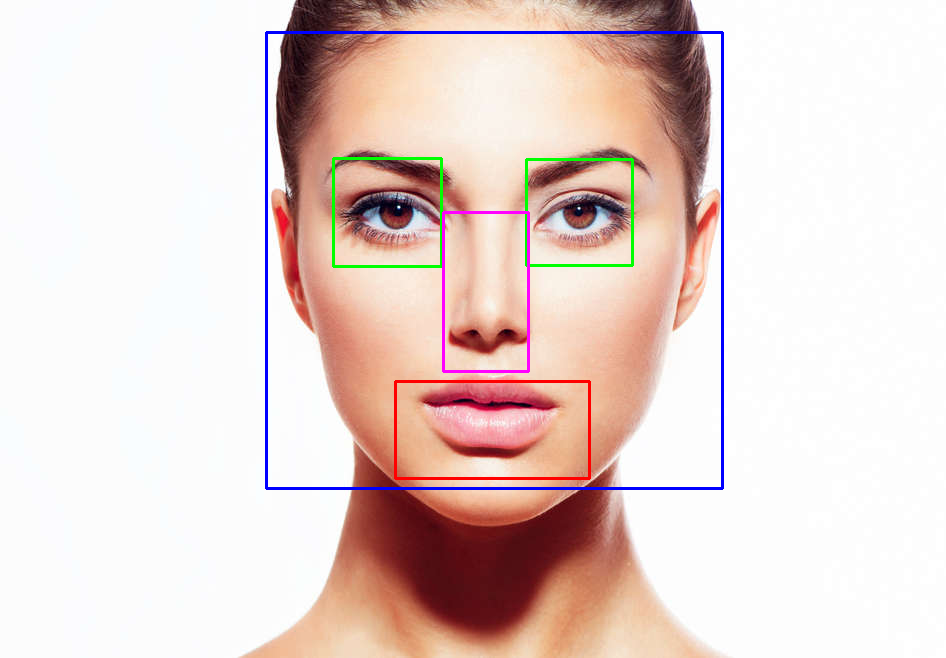

In [ ]:
cv2_imshow(l1_oznaceno)

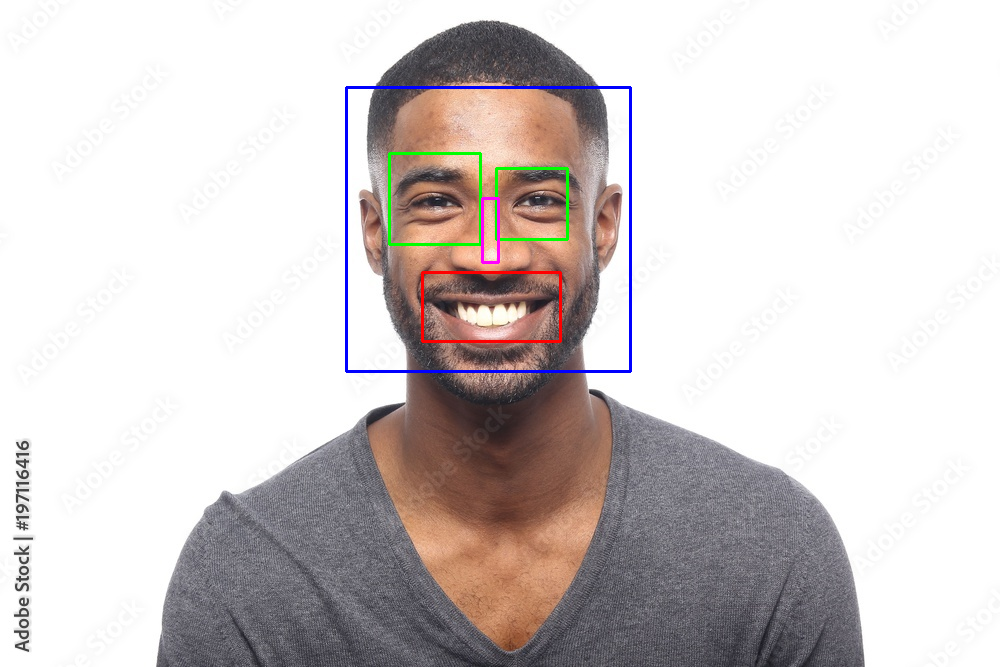

In [ ]:
cv2_imshow(l2_oznaceno)

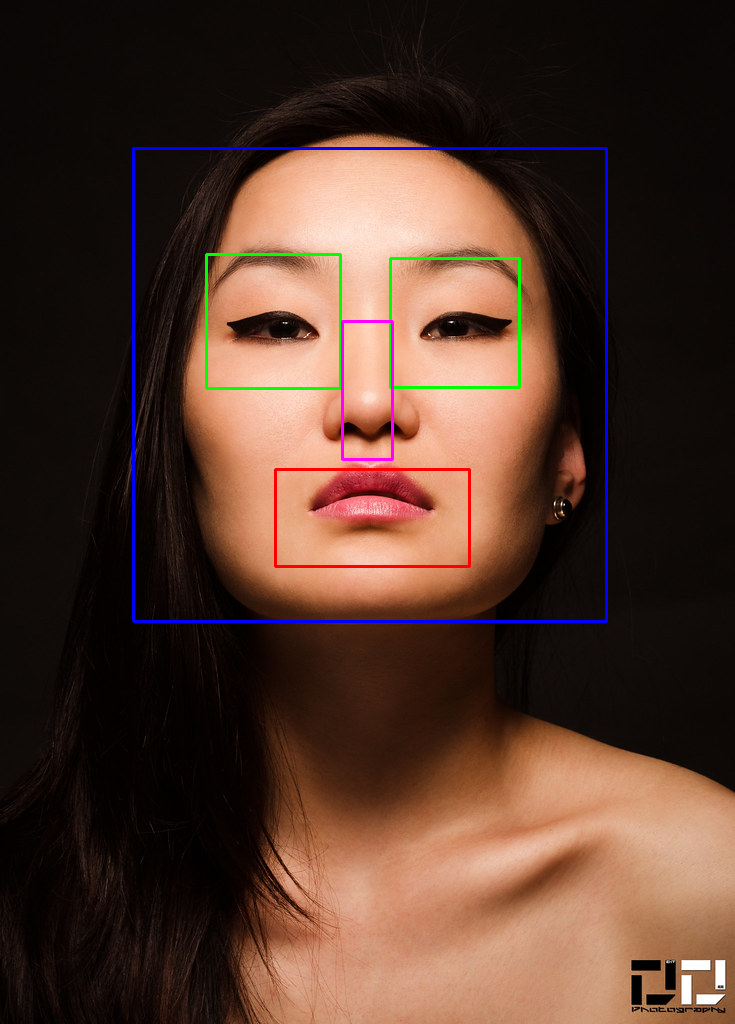

In [ ]:
cv2_imshow(l3_oznaceno)

In [ ]:
cv2_imshow(l4_oznaceno)

Tesiram na slici sa više osoba:

In [ ]:
!wget https://orangestudios.sg/wp-content/uploads/2020/06/23-51732-post/singapore-family-photography-01.jpg
!mv singapore-family-photography-01.jpg porodicna.jpg

--2022-05-30 19:29:39--  https://orangestudios.sg/wp-content/uploads/2020/06/23-51732-post/singapore-family-photography-01.jpg
Resolving orangestudios.sg (orangestudios.sg)... 35.213.151.119
Connecting to orangestudios.sg (orangestudios.sg)|35.213.151.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 748827 (731K) [image/jpeg]
Saving to: ‘singapore-family-photography-01.jpg’

singapore-family-ph 100%[===================>] 731.28K   675KB/s    in 1.1s    

2022-05-30 19:29:41 (675 KB/s) - ‘singapore-family-photography-01.jpg’ saved [748827/748827]



In [ ]:
img5=cv2.imread("porodicna.jpg")

In [ ]:
l5_oznacena=face_features_detection(img5)

[[129  62  59  59]
 [ 44  74  56  56]]
[[131  55  50  50]
 [ 49  79  52  52]
 [110 218  24  24]]
[[97 53 37 37]
 [27 42 47 47]]
[[27 37 45 45]
 [91 42 43 43]]
[[32 44 40 40]
 [95 44 38 38]]


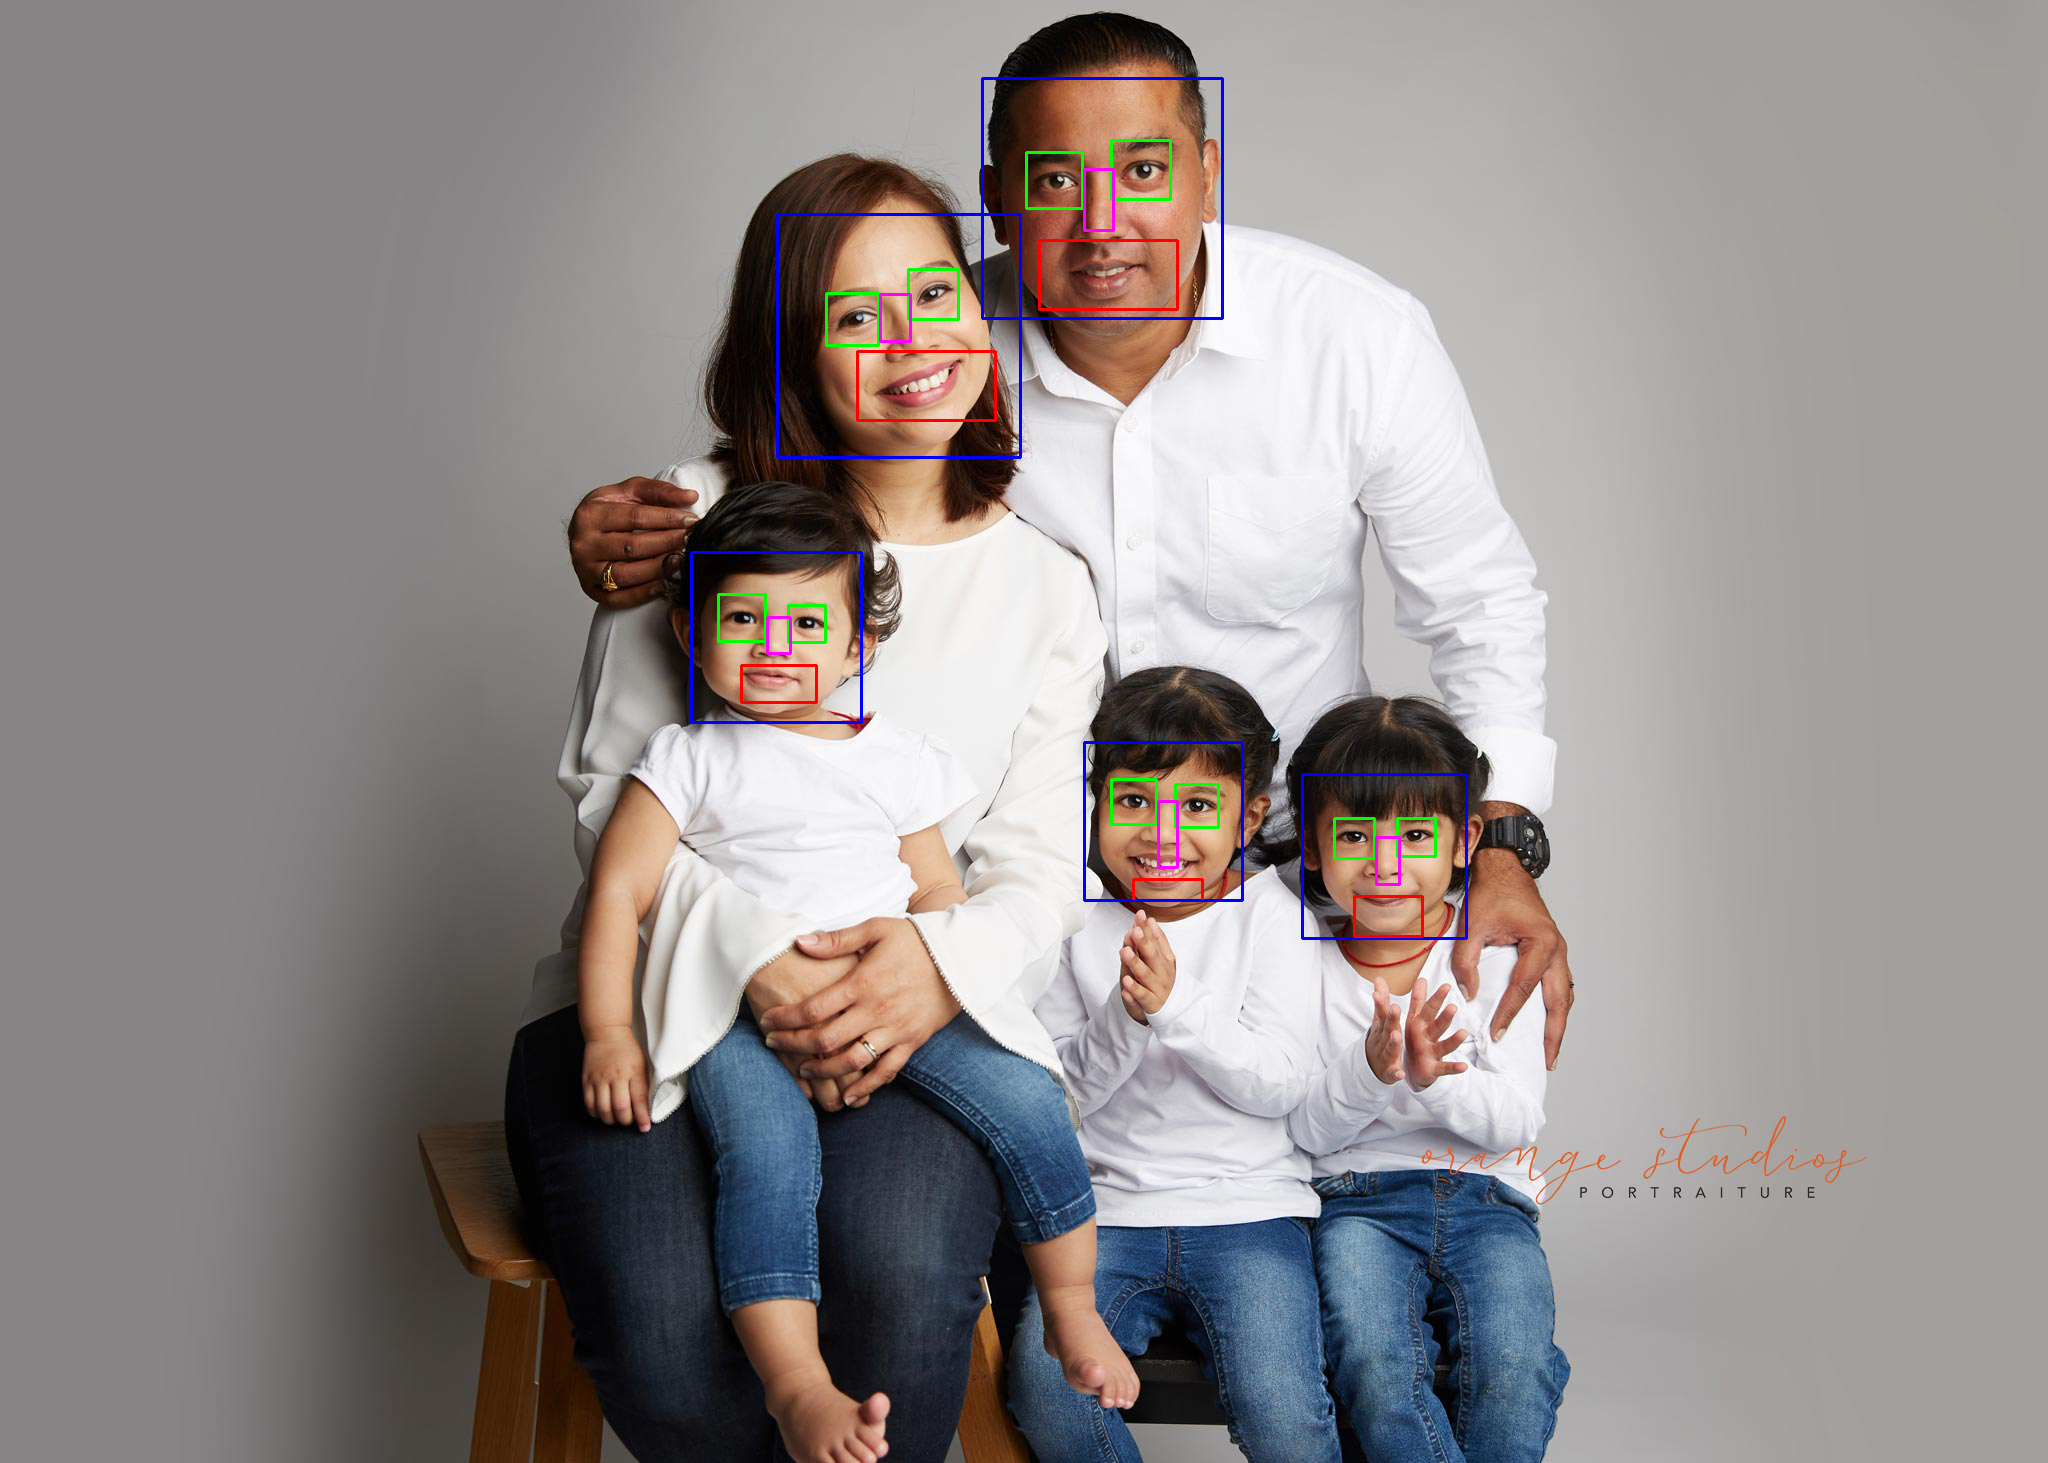

In [ ]:
cv2_imshow(l5_oznacena)

In [ ]:
!wget https://www.benetton.com/dw/image/v2/BBSF_PRD/on/demandware.static/-/Library-Sites-BenettonSharedLibrary/default/dw9527c9ac/01-REDESIGN/ARTICOLI/caroselli/Tutti%20i%20colori%20del%20mondo2.jpg
!mv "Tutti i colori del mondo2.jpg" beneton.jpg

--2022-05-30 19:29:59--  https://www.benetton.com/dw/image/v2/BBSF_PRD/on/demandware.static/-/Library-Sites-BenettonSharedLibrary/default/dw9527c9ac/01-REDESIGN/ARTICOLI/caroselli/Tutti%20i%20colori%20del%20mondo2.jpg
Resolving www.benetton.com (www.benetton.com)... 104.17.118.5, 104.17.117.5
Connecting to www.benetton.com (www.benetton.com)|104.17.118.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 331625 (324K) [image/jpeg]
Saving to: ‘Tutti i colori del mondo2.jpg’

Tutti i colori del  100%[===================>] 323.85K  --.-KB/s    in 0.03s   

2022-05-30 19:30:00 (9.35 MB/s) - ‘Tutti i colori del mondo2.jpg’ saved [331625/331625]



In [ ]:
i=cv2.imread("beneton.jpg")
test = face_features_detection(i)
cv2_imshow(test)

Output hidden; open in https://colab.research.google.com to view.